In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import numpy as np
from   astropy.table import Table, unique,vstack,join, unique
from   ros_tools import tile2rosette, calc_rosr
import S4Mock_io
import matplotlib.pyplot as plt
import glob
import pylab as pl
from astropy.io import fits as fits
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask
from desimodel.focalplane.geometry import get_tile_radius_deg

In [4]:
nights    = [x.split('/')[-1] for x in sorted(glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3' + '/*'))]

In [5]:
tiles = S4Mock_io.read_sv3tiles()
rosettes = np.unique(tiles['ROSETTE']).data

In [6]:
tiles

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE,ROSETTE
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool,int64
12,0,150.04,2.286,BRIGHT,True,0.000e+00,done,0.022782475,0.00,1.0455,False,0
13,1,150.061,2.069,BRIGHT,True,0.000e+00,done,0.023243327,0.00,1.1505,False,0
14,2,150.212,2.226,BRIGHT,True,0.000e+00,done,0.022683823,0.00,1.0456,False,0
15,3,149.98,2.171,BRIGHT,True,0.000e+00,done,0.023039486,0.00,1.1052,False,0
16,4,150.187,2.099,BRIGHT,True,0.000e+00,done,0.023041949,0.00,1.0776,False,0
17,5,150.106,2.302,BRIGHT,True,0.000e+00,done,0.022638734,0.00,1.1865,False,0
18,6,149.993,2.237,BRIGHT,True,0.000e+00,done,0.022844847,0.00,1.4589,False,0
19,7,150.128,2.065,BRIGHT,True,0.000e+00,done,0.023041053,0.00,1.3565,False,0
20,8,150.17,2.28,BRIGHT,True,0.000e+00,done,0.02263027,0.00,1.1368,False,0


In [ ]:
"""
rand = vstack([Table.read(x) for x in glob.glob('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random*/rancomb_brightwdup_Alltiles.fits')])

# TODO:  Check TARGETID is a unique identifier, or bug.  If not, use RA. 
#rand             = unique(rand, keys='TARGETID')
rand['ROS']      = np.array([tile2rosette(x) for x in rand['TILEID']]) 

In [7]:
get_tile_radius_deg()

1.6280324520485583

<Figure size 720x576 with 0 Axes>

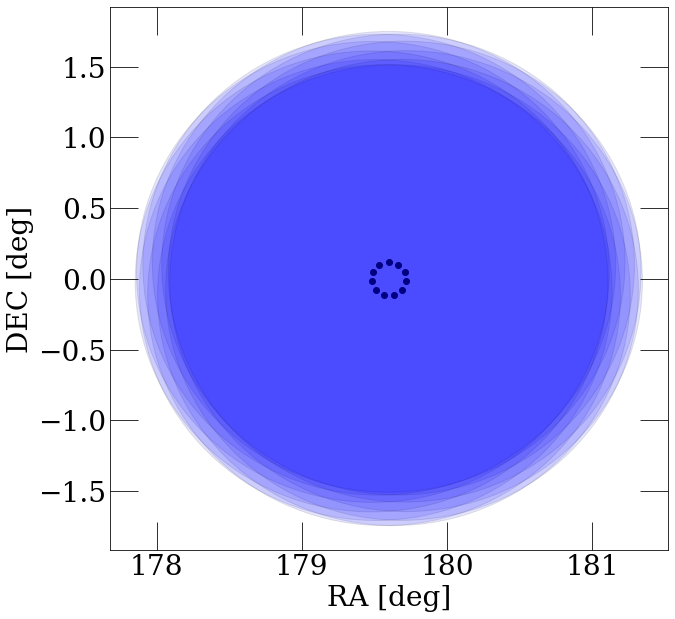

In [151]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

tiles0 = tiles[(tiles['ROSETTE']==1)]

fig,axes = plt.subplots(1, figsize=(10,10))


for i in range(len(tiles0)):
    xc = tiles0[i]['RA']
    yc = tiles0[i]['DEC']
    circle = plt.Circle((xc, yc), radius= 1.628, facecolor='blue',edgecolor='black',alpha=0.1)
    axes.add_patch(circle)
    axes.scatter(xc,yc,color='navy',zorder=3)

#axes.scatter(rand0['RA'],rand0['DEC'],alpha=0.15,marker='x',color='pink',zorder=2)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.savefig('tiles.png',bbox_inches='tight')

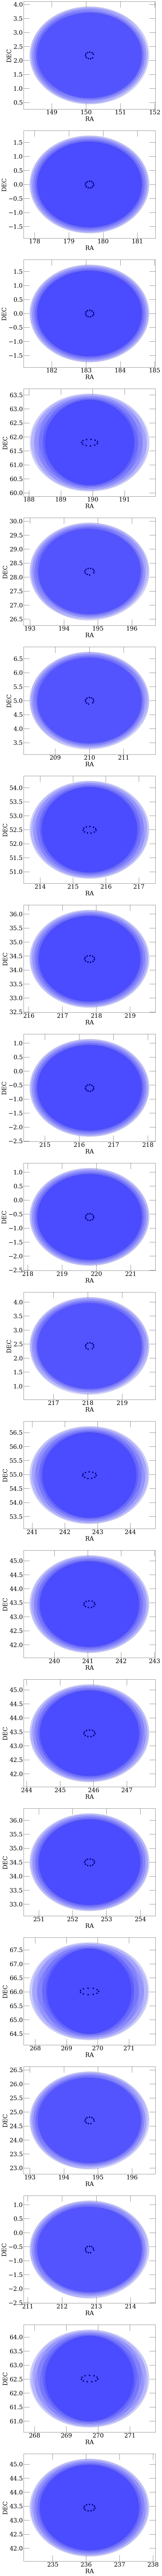

In [142]:
nrosette=20

fig, all_axes = plt.subplots(nrosette, figsize=(11,11 * nrosette))

for rosn in np.arange(nrosette):
    tiles0 = tiles[(tiles['ROSETTE']==rosn)]
    

    axes = all_axes[rosn]
    
    for i in range(len(tiles0)):
        xc = tiles0[i]['RA']
        yc = tiles0[i]['DEC']
        circle = plt.Circle((xc, yc), radius= 1.628, facecolor='blue',edgecolor='black',alpha=0.1)
        axes.add_patch(circle)
        axes.scatter(xc,yc,color='navy',zorder=3)

    #axes.scatter(rand0['RA'],rand0['DEC'],alpha=0.15,marker='x',color='pink',zorder=2)
    axes.set_xlabel('RA [deg]')
    axes.set_ylabel('DEC [deg]')

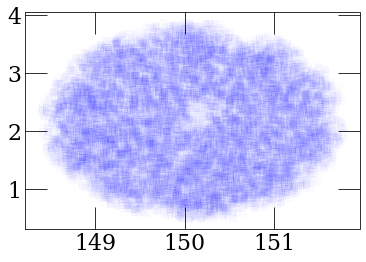

In [35]:
rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
rand['ROS'] = np.array([tile2rosette(x) for x in rand['TILEID']]) 

tiles0 = tiles[(tiles['ROSETTE']==0)]
rand0 = rand[(rand['ROS']==0)][::10]

pl.scatter(rand0['RA'],rand0['DEC'],alpha=0.01,marker=',',color='blue',zorder=2)
#pl.xlabel('RA')
#pl.ylabel('DEC)
#available 

In [36]:
ros=0

rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
rand['ROS']      = np.array([tile2rosette(x) for x in rand['TILEID']]) 

rand['ROS_DIST'] = 1.e99

rand = rand[rand['ROS'] == ros]

for rosn in np.unique(rand['ROS']):
    isin = (rand['ROS'].data == rosn)

    new_dist = calc_rosr(rosn, rand['RA'][isin], rand['DEC'][isin])

    rand['ROS_DIST'][isin] = np.minimum(rand['ROS_DIST'][isin], new_dist)

In [37]:
tiles0 = tiles[(tiles['ROSETTE']==0)]
rand0 = rand[(rand['ROS']==0)]

Text(0, 0.5, 'DEC')

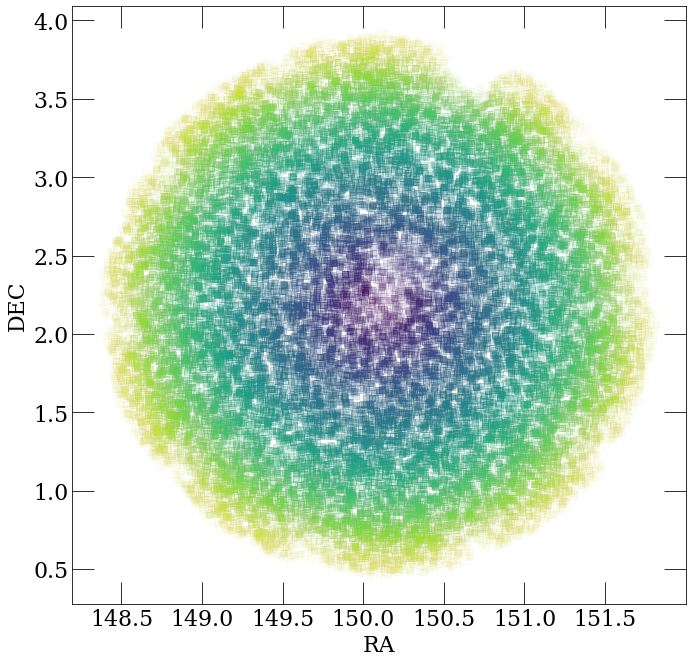

In [38]:
fig = plt.figure(figsize=(11,11))
axes = fig.add_subplot(111)

axes.scatter(rand0['RA'],rand0['DEC'],alpha=0.02,marker=',',c=rand['ROS_DIST'])
axes.set_xlabel('RA')
axes.set_ylabel('DEC')

Text(0, 0.5, 'DEC')

<Figure size 864x720 with 0 Axes>

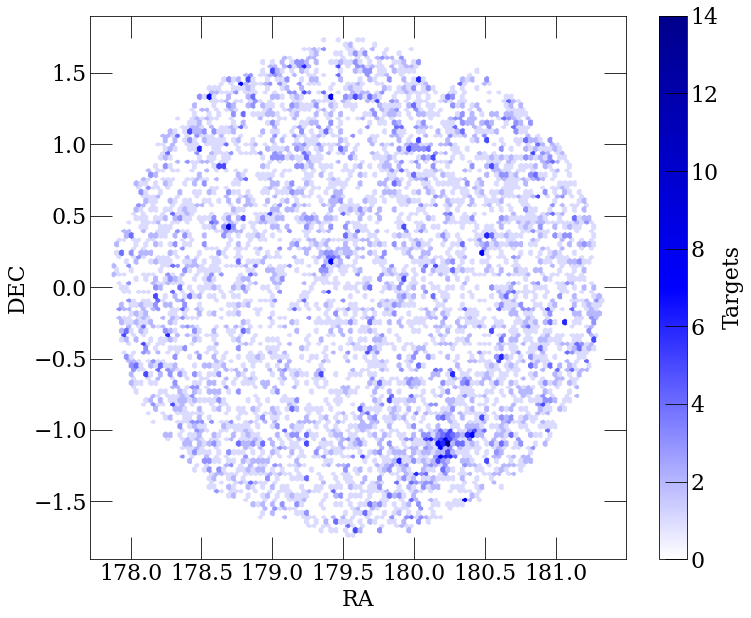

In [123]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12,10))
cmap0 = LinearSegmentedColormap.from_list('', ['white','blue', 'darkblue'])

plt.hexbin(mock_avail3['RA'],mock_avail3['DEC'],cmap=cmap0)

cbar = plt.colorbar()
cbar.set_label('Targets')
plt.xlabel('RA')
plt.ylabel('DEC')

(array([  69.,  126.,  238.,  388.,  485.,  878., 1030., 1204., 1254.,
        1672., 1533., 2162., 2065., 2456., 2636., 2813., 2972., 3081.,
        3376., 3583., 3574., 3912., 3966., 4170., 4216., 4330., 4968.,
        4790., 5311., 5283., 5574., 5422., 5581., 5940., 6052., 6871.,
        6306., 6852., 6776., 6402., 6752., 6418., 6181., 4816., 4073.,
        3451., 2866., 2270., 1491.,  314.]),
 array([0.01093937, 0.04559964, 0.08025991, 0.11492017, 0.14958044,
        0.18424071, 0.21890097, 0.25356124, 0.28822151, 0.32288178,
        0.35754204, 0.39220231, 0.42686258, 0.46152284, 0.49618311,
        0.53084338, 0.56550365, 0.60016391, 0.63482418, 0.66948445,
        0.70414471, 0.73880498, 0.77346525, 0.80812552, 0.84278578,
        0.87744605, 0.91210632, 0.94676658, 0.98142685, 1.01608712,
        1.05074739, 1.08540765, 1.12006792, 1.15472819, 1.18938845,
        1.22404872, 1.25870899, 1.29336926, 1.32802952, 1.36268979,
        1.39735006, 1.43201032, 1.46667059, 1.50133086, 

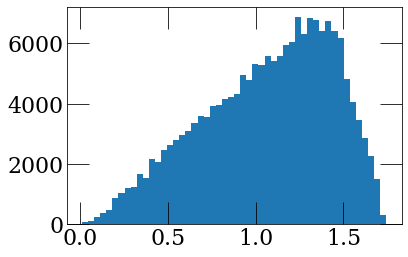

In [40]:
plt.hist(rand['ROS_DIST'],bins=50)

In [8]:
tile_stack = []

for night in nights:
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FASSIGN'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5]) # string.split('-')[-1].replace('.fits', '')
        fba['ROS'] = tile2rosette(int(to_grab[x][-11:-5]))
        tile_stack.append(fba)

fassign = vstack(tile_stack)

In [9]:
tile_stack = []

for night in nights:
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FAVAIL'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5]) # string.split('-')[-1].replace('.fits', '')
        fba['ROS'] = tile2rosette(int(to_grab[x][-11:-5]))
        tile_stack.append(fba)

favail = vstack(tile_stack)

In [32]:
"""
tile_stack = []

for night in nights:
    # to_grab = sorted(glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits'))
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FAVAIL'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5])
        tile_stack.append(fba)

        # Here, we add a count of NAVAIL per targetid. 
        # TILEID at which that number becomes 3 for main-survey like

        # tiles were likely not observed in the order they assigned ....
        
favail = vstack(tile_stack)

In [10]:
ledger= S4Mock_io.read_init_ledger()

In [11]:
ledger = ledger[((ledger['SV3_BGS_TARGET']) & (bgs_mask['BGS_BRIGHT']) != 0)]

In [12]:
mock_assigned = fassign[np.in1d(fassign['TARGETID'],ledger['TARGETID'])]
mock_avail = favail[np.in1d(favail['TARGETID'],ledger['TARGETID'])]

In [13]:
mask,idx = np.unique(mock_assigned['TARGETID'].data,return_index=True)
mock_assigned = mock_assigned[idx]

In [14]:
mask,idx = np.unique(mock_avail['TARGETID'].data,return_index=True)
mock_avail = mock_avail[idx]

In [18]:
len(mock_avail)/1000

160.789

In [25]:
mock_avail['RA'] = 1e9
mock_avail['DEC'] = 1e9

for i in range(len(mock_avail)):
    mock_avail[i]['RA']= ledger[(ledger['TARGETID']==mock_avail[i]['TARGETID'])]['RA']
    mock_avail[i]['DEC']= ledger[(ledger['TARGETID']==mock_avail[i]['TARGETID'])]['DEC']
    if (i % 1000) == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [26]:
mock_assigned['ROS_DIST'] = 1.e9

for rosn in np.arange(20):
    isin = mock_assigned['ROS'] == rosn
    
    mock_assigned['ROS_DIST'][isin] = calc_rosr(rosn, mock_assigned['TARGET_RA'][isin], mock_assigned['TARGET_DEC'][isin])

In [27]:
mock_avail['ROS_DIST'] = 1.e9

for rosn in np.arange(20):
    isin = mock_avail['ROS'] == rosn
    
    mock_avail['ROS_DIST'][isin] = calc_rosr(rosn, mock_avail['RA'][isin], mock_avail['DEC'][isin])

In [28]:
mock_avail

LOCATION,FIBER,TARGETID,TILEID,ROS,RA,DEC,ROS_DIST
int32,int32,int64,int64,int64,float64,float64,float64
2443,1364,39627758191511075,256,9,218.3129847817101,-1.3554575773095174,1.667709350268169
2121,1413,39627787727799760,39,1,178.81672501907323,-0.004537883300370895,0.7832881250520497
6487,3499,39627806488922237,231,8,217.0930166986863,0.787021402562179,1.597708192419795
9463,4727,39627884876271777,147,5,211.21213095457597,4.033946610676072,1.5470527738332591
7076,3996,39633419763716081,555,18,271.0683494255684,62.82941393953778,0.6878577990617093
7432,3812,39633419780490071,555,18,272.8071751583444,62.86990717798095,1.4541511578551476
2102,1275,39633451355212011,418,15,267.9038794914507,65.67515077913986,0.8228858012639431
7202,3871,39633456321266273,418,15,271.94751429477134,66.29193176616927,0.9367063576624431
1136,999,288230385739890690,201,7,217.51210021972656,33.58879089355469,0.8455965111105238


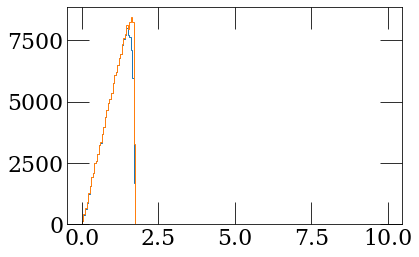

In [29]:
asssigned_counts = plt.hist(mock_assigned['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')
available_counts = plt.hist(mock_avail['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')

<ipython-input-178-5b3f57c83dd7>:13: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(available_counts[1][:-1],( asssigned_counts[0] / available_counts[0]),color='#4834d4',linewidth=2)


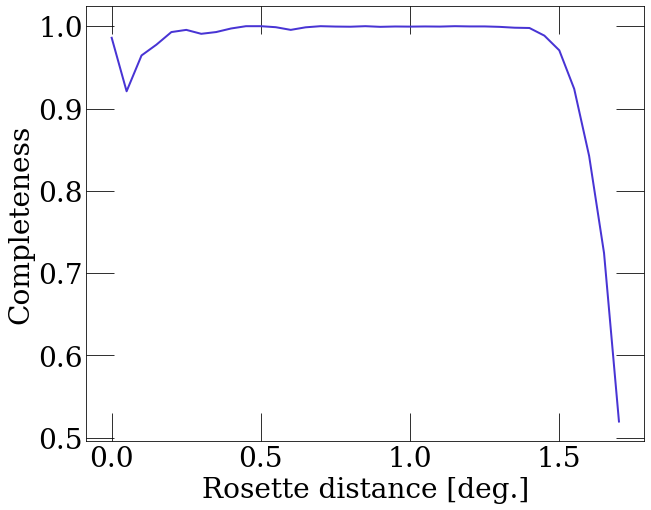

In [178]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

fig, ax1 = plt.subplots(1, 1,figsize=(10,8))

ax1.plot(available_counts[1][:-1],( asssigned_counts[0] / available_counts[0]),color='#4834d4',linewidth=2)



ax1.set_xlabel('Rosette distance [deg.]')
ax1.set_ylabel('Completeness')
plt.savefig('ros_dis.png',bbox_inches='tight')

In [99]:
mock_avail3 = mock_avail[(mock_avail['ROS'] == 1)]
mock_assign3 = mock_assigned[(mock_assigned['ROS'] == 1)]

In [100]:
import geometry
import healpy as hp
mock_i_density = geometry.targ_hpmap(mock_avail3,nside=256)

pix = geometry.radec2pix(mock_assign3['TARGET_RA'], mock_assign3['TARGET_DEC'], nside=256)
    
#indice of filled pixels and corrosponding targets in pixel
filled_pixel_index, filled_targets_per_pixel = np.unique(pix, return_counts=True) 

#no. targets per pixel, initially 0 
target_pixel_density = np.zeros(hp.nside2npix(256))

#update no. targets per pixel 
target_pixel_density[filled_pixel_index] = filled_targets_per_pixel 
target_pixel_density[target_pixel_density == 0] = np.NaN
    
mock_a_density = target_pixel_density


In [101]:
mock_fib_eff = mock_a_density/mock_i_density

In [102]:
len(mock_fib_eff)

786432

In [103]:
randoms = S4Mock_io.read_sv3_randoms()

In [104]:
uras, idx = np.unique(randoms['RA'], return_index=True)
randoms=randoms[idx]

In [105]:
randoms=Table(randoms)
randoms

LOCATION,FIBER,TARGETID,RA,DEC,TILEID
int32,int32,int64,float64,float64,int64
3416,1626,327858217725985207,148.36505647263715,2.190264172123968,15
3462,1612,327858217725985166,148.36806029831172,2.343330594146809,15
3440,1629,327858217725986166,148.37014119959804,2.2522218962844938,15
3416,1626,327858217725987201,148.37369778857442,2.1820587219467127,15
3416,1626,327858217725984909,148.38275385890032,2.2700749728046867,18
3416,1626,327858217725986359,148.38324913330405,2.2033310224083604,15
3463,1643,327858217725985522,148.38494423196707,2.3682474160396656,15
3462,1612,327858223765784045,148.38500645757475,2.387601997623345,18
3462,1612,327858223765783257,148.38564498981927,2.3997330639933496,18


In [106]:
def tile2rosette(tile):
    if tile < 433:
        return (tile-1)//27
    else:
        if tile >= 433 and tile < 436:
            return 13
        if tile >= 436 and tile < 439:
            return 14
        if tile >= 439 and tile < 442:
            return 15
        if tile >= 442 and tile <=480:
            return (tile-442)//3
            
        if tile > 480:
            return tile//30    
    return 999999 #shouldn't be any more?

randoms['ROSETTE'] = [tile2rosette(x) for x in randoms['TILEID']]

In [107]:
randoms = randoms[randoms['ROSETTE'] == 1]

In [108]:

theta = np.pi / 2. - np.radians(randoms['DEC'].data)
phi = np.radians(randoms['RA'].data)

#indices of pixels with non-zero density, unorganised list
all_pixel_indices = hp.ang2pix(256, theta, phi,nest=True, lonlat=False) 

In [109]:
all_pixel_indices = np.unique(all_pixel_indices)

In [110]:
all_pixel_indices

array([409527, 409533, 409535, 409543, 409545, 409546, 409547, 409548,
       409549, 409550, 409551, 409554, 409555, 409558, 409559, 409560,
       409561, 409562, 409563, 409564, 409565, 409566, 409567, 409568,
       409569, 409570, 409571, 409572, 409573, 409574, 409575, 409576,
       409577, 409578, 409579, 409580, 409581, 409582, 409583, 409584,
       409585, 409586, 409587, 409588, 409589, 409590, 409591, 409592,
       409593, 409594, 409595, 409596, 409597, 409598, 409599, 420488,
       420489, 420490, 420491, 420492, 420494, 420495, 420512, 420513,
       420514, 420515, 420516, 420517, 420518, 420519, 420520, 420521,
       420522, 420523, 420524, 420525, 420526, 420527, 420528, 420530,
       420531, 420536, 420537, 420538, 420539, 420542, 431381, 431383,
       431389, 431391, 431424, 431425, 431426, 431427, 431428, 431429,
       431430, 431431, 431432, 431433, 431434, 431435, 431436, 431437,
       431438, 431439, 431440, 431441, 431442, 431443, 431444, 431445,
      

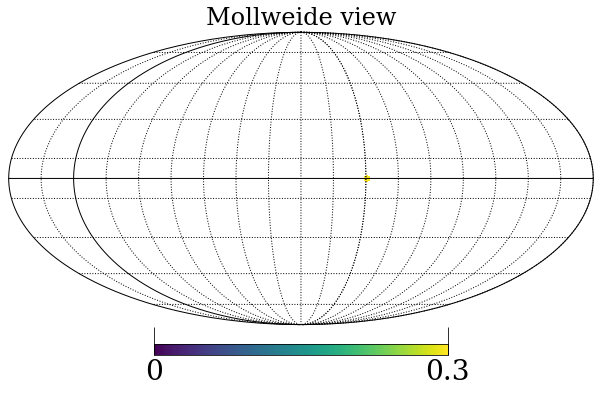

In [111]:
random_map = np.zeros(hp.nside2npix(256))
random_map = mock_fib_eff
random_map[random_map == 0] = np.NaN 

hp.mollview(random_map,nest=True,rot=(220, 0.0, 0.0), badcolor='white',min=0,max=0.3)
hp.graticule(dpar=5, dmer=5)

In [112]:
allocated_eff = random_map[all_pixel_indices]

In [113]:
theta = np.pi / 2. - np.radians(randoms['DEC'].data)
phi = np.radians(randoms['RA'].data)

rand_pixel_indices = hp.ang2pix(256, theta, phi,nest=True, lonlat=False)

In [136]:
rand_color = random_map[rand_pixel_indices]

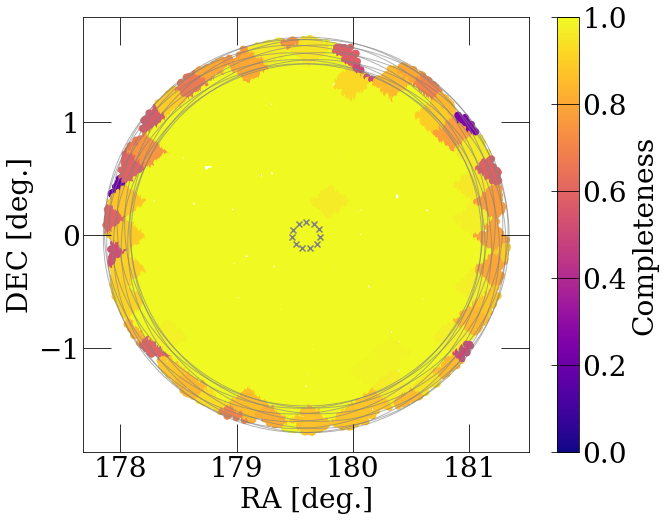

In [176]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

fig, ax1 = plt.subplots(1, 1,figsize=(10,8))

#this is a plot of ra vs dec for randoms that have been allocated an efficiency, i.e those in tiles in rosette 15

p = ax1.scatter(randoms['RA'],randoms['DEC'],c=rand_color,cmap = 'plasma', vmin=0.0, vmax=1.0)
fig.colorbar(mappable=p,label ='Completeness',ax=ax1)


plt.xlabel('RA [deg.]')
plt.ylabel('DEC [deg.]')



tiles0 = tiles[(tiles['ROSETTE']==1)]




for i in range(len(tiles0)):
    xc = tiles0[i]['RA']
    yc = tiles0[i]['DEC']
    circle = plt.Circle((xc, yc), radius= 1.628)
    ax1.add_patch(circle)
    circle.set_edgecolor('grey')
    circle.set_facecolor('none')
    circle.set_alpha(0.6)
    ax1.scatter(xc,yc,color='grey',marker='x',zorder=3)

#plt.scatter(179.6,0,marker='x',color='black',s=55)
plt.savefig('ros_comp.png',bbox_inches='tight')

In [18]:
avl_ledger = ledger[np.isin(ledger['TARGETID'], favail['TARGETID'])]
avl_ledger = join(avl_ledger,favail,  keys='TARGETID', join_type='left')

In [46]:
avl_ledger = unique(avl_ledger, keys='TARGETID')

In [72]:
len(ledger) / len(avl_ledger)

0.08927077534791253

In [48]:
avl_ledger = join(avl_ledger, fassign, keys='TARGETID', join_type='left')

In [49]:
sorted(avl_ledger.dtype.names)

['DEC',
 'DEVICE_LOC',
 'DEVICE_TYPE',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'FIBERSTATUS',
 'FIBER_1',
 'FIBER_2',
 'LAMBDA_REF',
 'LOCATION_1',
 'LOCATION_2',
 'NUMOBS',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'OBSCONDITIONS',
 'PARALLAX',
 'PETAL_LOC',
 'PMDEC',
 'PMRA',
 'PRIORITY',
 'PRIORITY_INIT',
 'RA',
 'REF_EPOCH',
 'ROS',
 'SUBPRIORITY',
 'SV3_BGS_TARGET',
 'SV3_DESI_TARGET',
 'SV3_MWS_TARGET',
 'SV3_SCND_TARGET',
 'TARGETID',
 'TARGET_DEC',
 'TARGET_RA',
 'TARGET_STATE',
 'TILEID_1',
 'TILEID_2',
 'TIMESTAMP',
 'VERSION',
 'Z',
 'ZTILEID',
 'ZWARN']

In [50]:
# fassign = fassign[~fassign['RA'].mask]
# favail = favail[~favail['RA'].mask]

is_bright = (fassign['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0
fassign_bright = fassign[is_bright]

is_bright = (favail['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0
favail_bright = favail[is_bright]

In [51]:
avl_ledger['ROS_DIST'] = 1.e9

for rosn in np.arange(20):
    isin = avl_ledger['ROS'] == rosn
    
    avl_ledger['ROS_DIST'][isin] = calc_rosr(rosn, avl_ledger['RA'][isin], avl_ledger['DEC'][isin])

In [52]:
assigned = avl_ledger[~avl_ledger['FIBERASSIGN_X'].mask]

In [53]:
100. * len(assigned) / len(avl_ledger)

97.95103957075789

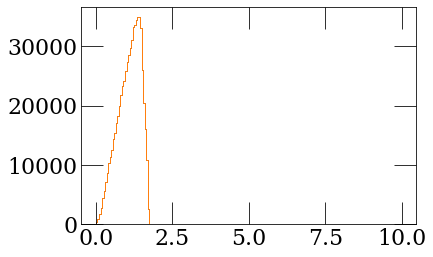

In [60]:
asssigned_counts = plt.hist(assigned['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')
available_counts = plt.hist(avl_ledger['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')

In [61]:
available_counts[1][:-1]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

<ipython-input-62-59c6e5add089>:13: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(available_counts[1][:-1], asssigned_counts[0] / available_counts[0])


Text(0, 0.5, 'Completeness')

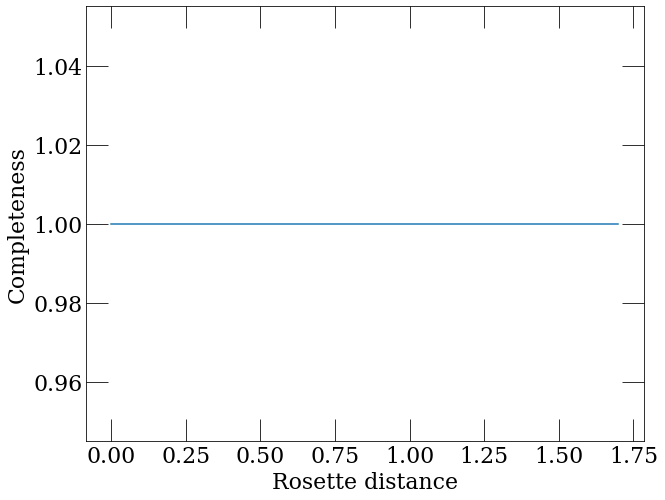

In [62]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

plt.plot(available_counts[1][:-1], asssigned_counts[0] / available_counts[0])

plt.xlabel('Rosette distance')
plt.ylabel('Completeness')

In [63]:
available_counts[1][:-1]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

In [64]:
asssigned_counts[0] / available_counts[0]

<ipython-input-64-1279535307f7>:1: RuntimeWarning: invalid value encountered in true_divide
  asssigned_counts[0] / available_counts[0]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

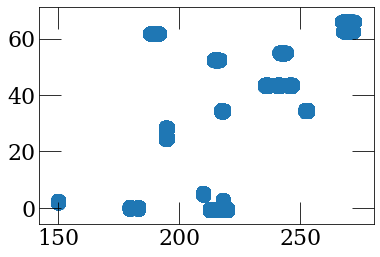

In [65]:
plt.scatter(avl_ledger['RA'],avl_ledger['DEC'])